In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In questo notebook vengono analizzate le simulazioni caratterizzate da parametro:
$$\alpha\,=\,1\cdot 10^{-3}$$

In [2]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;">Eccentricità: e = 0 </span>

<center>

### Output finali

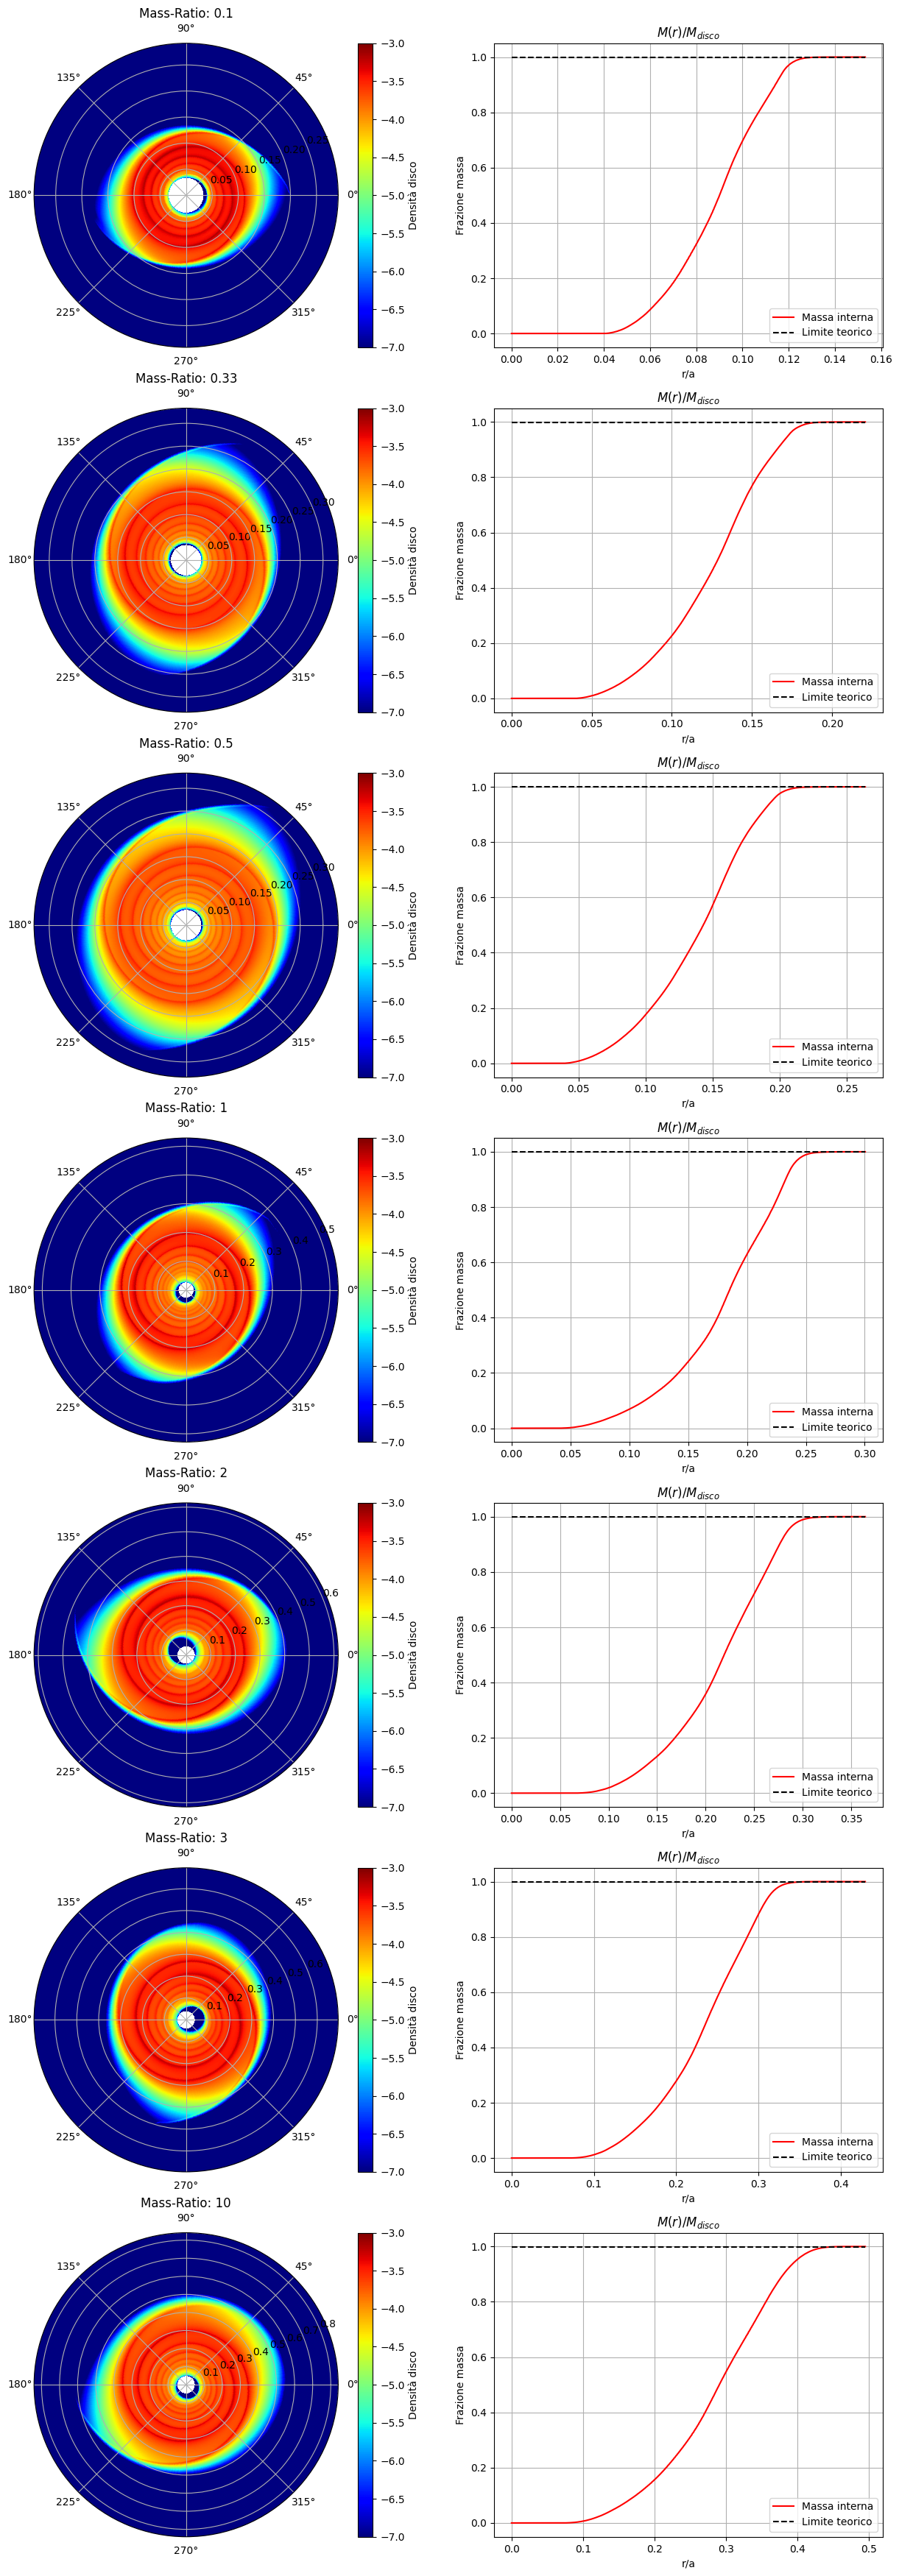

In [3]:
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Semi-assi maggiori

In [4]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e0[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e0[h], 3)) + " a")



Il raggio di troncamento con mass-ratio 0.1 è: 0.131 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.194 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.22 a
Il raggio di troncamento con mass-ratio 1 è: 0.267 a
Il raggio di troncamento con mass-ratio 2 è: 0.321 a
Il raggio di troncamento con mass-ratio 3 è: 0.354 a
Il raggio di troncamento con mass-ratio 10 è: 0.452 a


<center>

# <span style="color:blue;">Eccentricità: e = 0.3 </span>

<center>

### Output finali

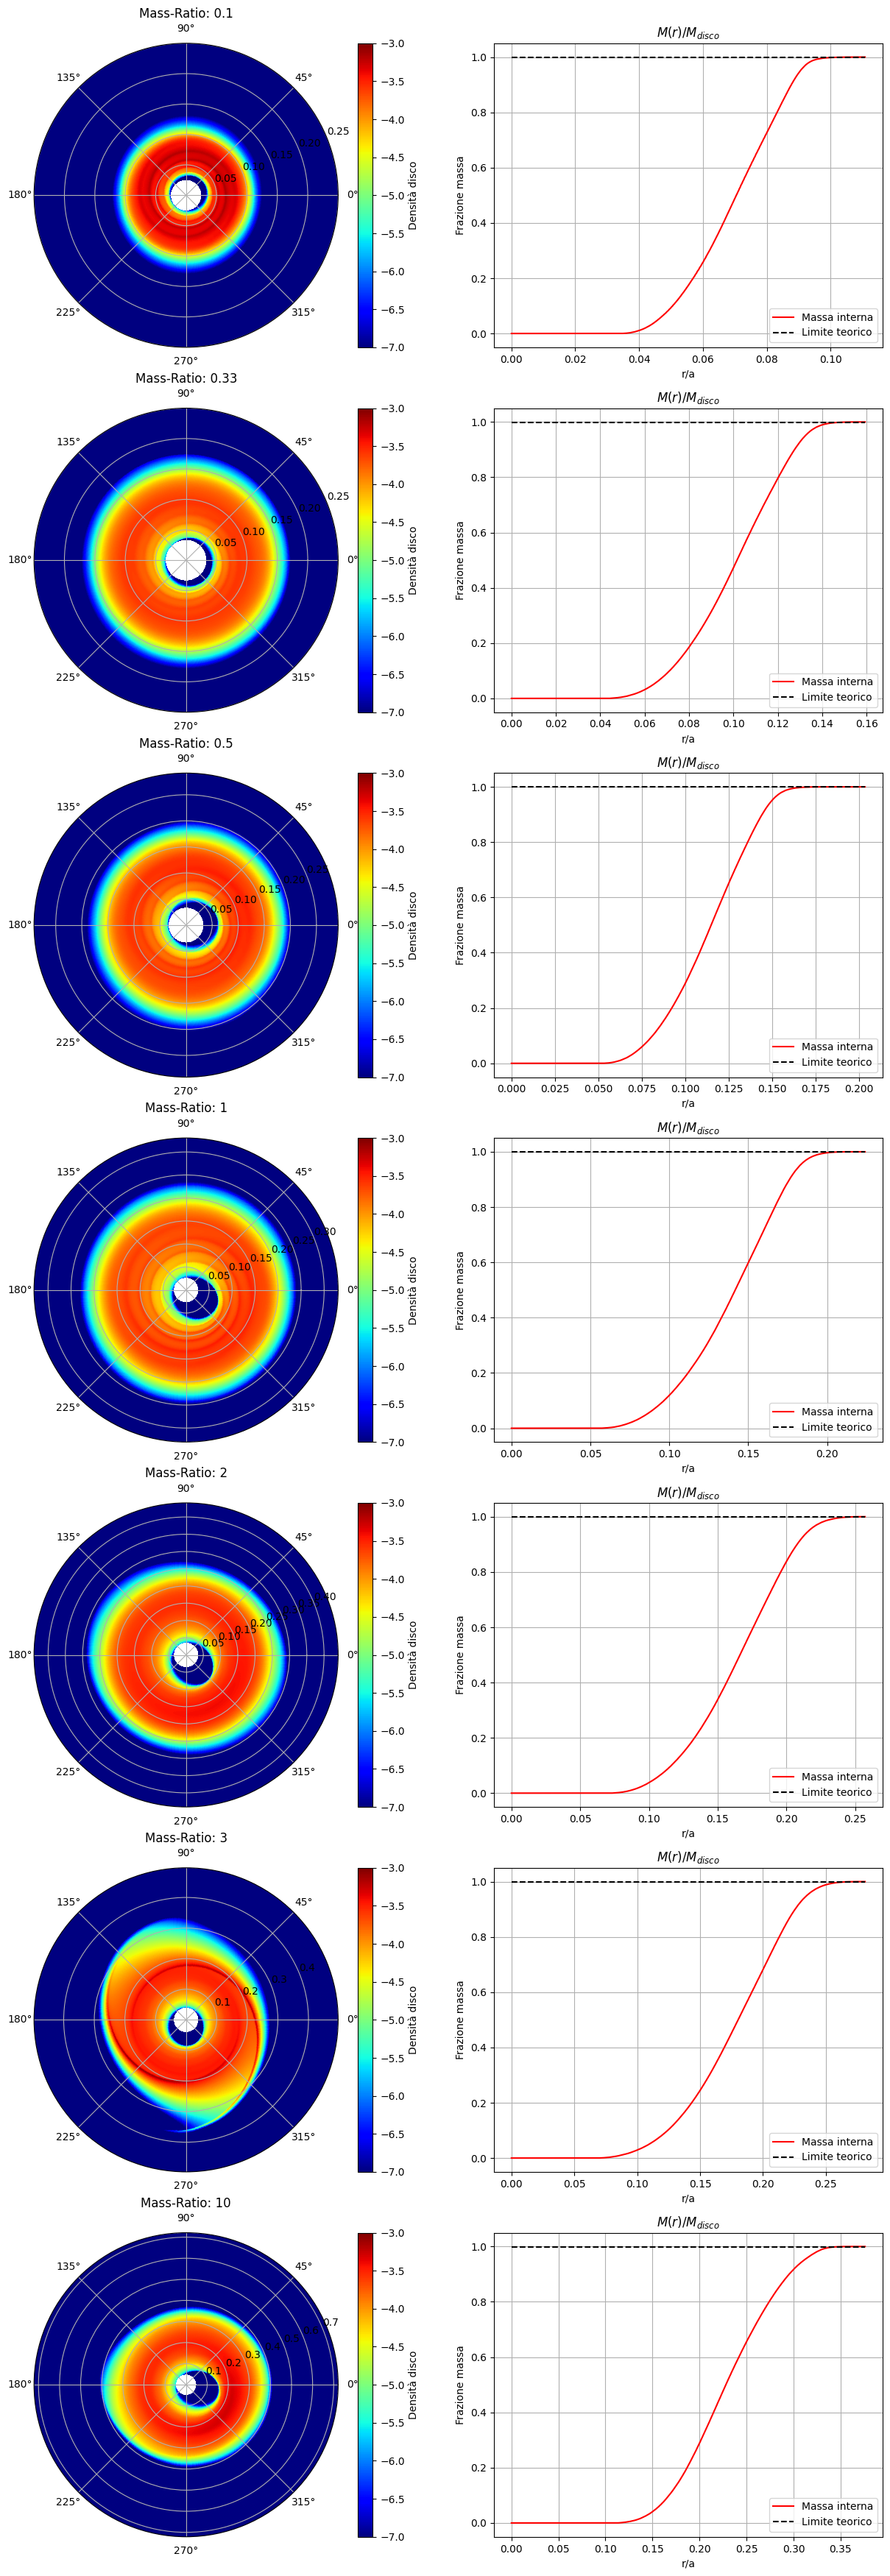

In [5]:
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-3/MedEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-3/MedEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-3/MedEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Semi-assi maggiori

In [6]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e3 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e3[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e3[h], 3)) + " a")



Il raggio di troncamento con mass-ratio 0.1 è: 0.102 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.152 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.171 a
Il raggio di troncamento con mass-ratio 1 è: 0.207 a
Il raggio di troncamento con mass-ratio 2 è: 0.245 a
Il raggio di troncamento con mass-ratio 3 è: 0.271 a
Il raggio di troncamento con mass-ratio 10 è: 0.34 a


<center>

# <span style="color:blue;">Eccentricità: e = 0.6 </span>

<center>

### Output finali

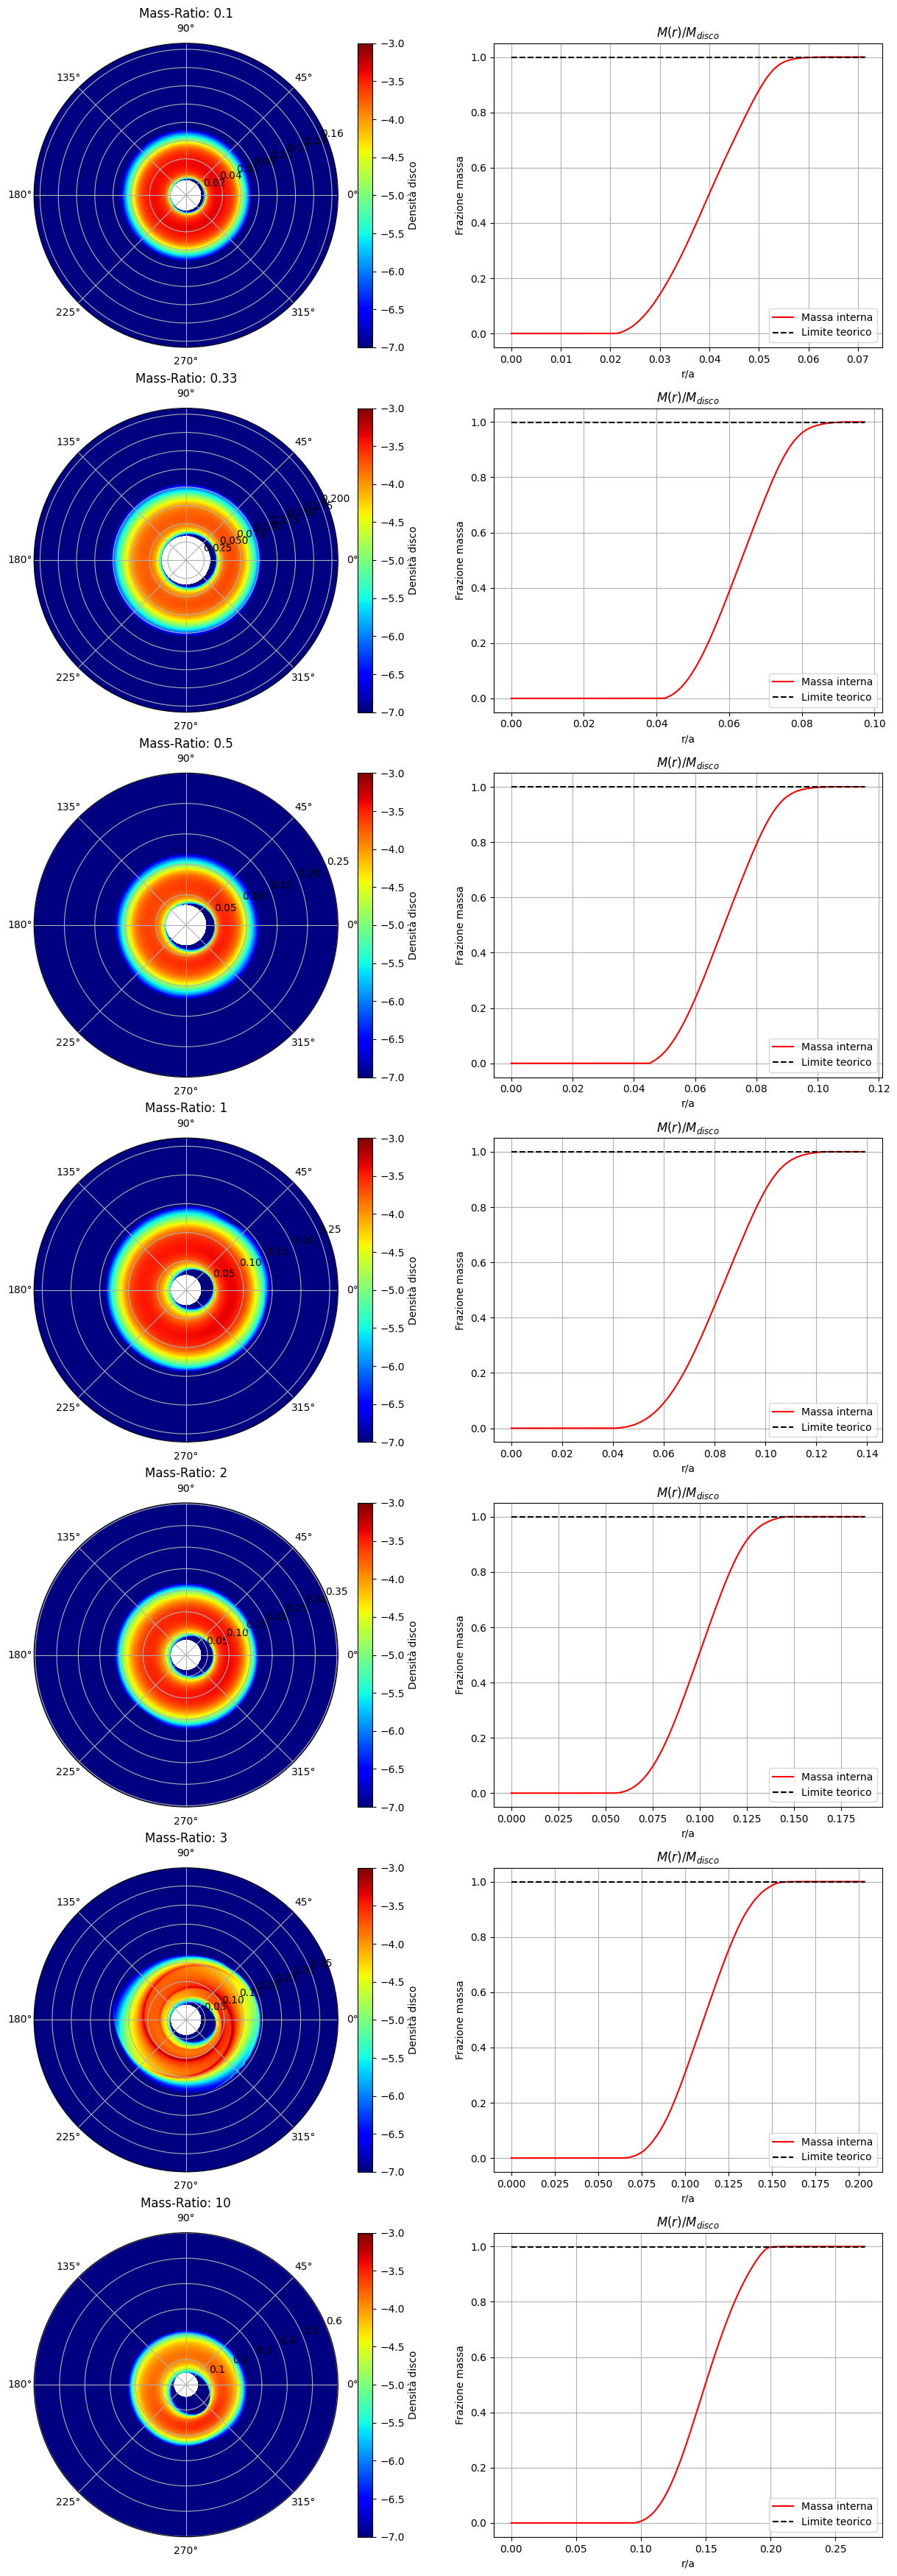

In [7]:
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])

fig = plt.figure(figsize=(15, 44))

for h in range(0, len(massr)):
    rho = np.fromfile("../Alpha-3/HighEcc/MR"+massr[h]+"/gasdens100.dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-3/HighEcc/MR"+massr[h]+"/gasvx100.dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-3/HighEcc/MR"+massr[h]+"/gasvy100.dat").reshape(384, 1152)

    #Creo la griglia angolare
    theta = np.linspace(-np.pi, np.pi, 1152)
    #Creo la griglia radiale corretta
    r = np.linspace(rmin[h], rmax[h], 385)
    r_plot = np.zeros(384)
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
    #Creo la griglia richiesta per gli output
    Theta, R = np.meshgrid(theta, r_plot/dist[h])

    min_ax = 0; max_ax = 0
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Condizioni sull'asse maggiore
                if ax_appo < min_ax:
                    min_ax = ax_appo
            
                elif ax_appo > max_ax:
                    max_ax = ax_appo

    #Riempio vettore delle masse progressive
    sax_mag = np.linspace(min_ax, max_ax, 1000)
    m_prog = np.zeros(1000)

    #Determino la massa dei vari anellini
    for i in range(0, 384):

        #Calcolo area delle cellette
        area = np.pi * (pow(r[i+1], 2) - pow(r[i], 2))
        area = area/1152

        for j in range(0, 1152):
            if np.log10(rho[i, j]) > -8.5:
                ene = 0.5 * (pow(vx[i, j], 2) + pow(vy[i, j], 2)) - 1.0/r_plot[i]
                ax_appo = - 1.0/(2 * ene* dist[h])

                #Calcolo massa nei vari anelli
                ind = math.floor((ax_appo - sax_mag[0])/(sax_mag[1] - sax_mag[0]))
                m_prog[ind] += rho[i, j] * area
    
    #Creo le masse progressive
    for i in range(0, len(m_prog)):
        if i != 0:
            m_prog[i] = m_prog[i-1] + m_prog[i]

    ax = fig.add_subplot(7, 2, 2*h+1, projection='polar')
    #-----------------------------------#
    #      Disegno grafico polare       #
    #-----------------------------------#

    #Disegnare il grafico polare
    cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
    plt.colorbar(cax, label='Densità disco')
    ax.set_rmin(0)
    ax.set_rmax(rmax[h]/dist[h])
    ax.set_title(f'Mass-Ratio: '+ massr[h])

    ax = fig.add_subplot(7, 2, 2*(h+1))


    #Valore per confronto teorico
    teo_val = np.zeros(len(m_prog))
    for i in range(0, len(m_prog)):
        teo_val[i] = 0.999

    ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
    ax.plot(sax_mag, teo_val, color = 'black', linestyle = '--', label = 'Limite teorico')
    ax.set_title(r'$M\left(r\right)/M_{disco}$')
    ax.set_xlabel(r'r/a')
    ax.set_ylabel('Frazione massa')
    ax.legend(loc='best')
    ax.grid(True)

plt.show()

### Semi-assi maggiori

In [8]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e6 = np.zeros(7)

for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    for k in range(0, num[h]):

        rho = np.fromfile("../Alpha-3/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("../Alpha-3/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("../Alpha-3/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)

        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros((384, 1152))
        for i in range(0, 384):
            for j in range(0, 1152):
                r_plot[i, j] = (r[i+1] + r[i])/2

        #Valuto area delle celle
        area = np.zeros((384, 1152))
        for i in range(0, 383):
            appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
            for j in range(0, 1152):
                area[i, j] = appo


        #Calcolo energia e massa delle cellette
        ene = 0.5 * (vx**2 + vy**2) - 1.0/r_plot
        mas = rho * area

        #Calcolo il semi-asse
        ax = - 1.0/(2 * ene * dist[h])
        ax.reshape(384 * 1152)
        mas.reshape(384 * 1152)

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mas[ax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= par_rag * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break
        
    sax_A3_e6[h] = rag.sum()/num[h]
    print("Il raggio di troncamento con mass-ratio " + massr[h] + " è: " + str(round(sax_A3_e6[h], 3)) + " a")


    

Il raggio di troncamento con mass-ratio 0.1 è: 0.061 a
Il raggio di troncamento con mass-ratio 0.33 è: 0.091 a
Il raggio di troncamento con mass-ratio 0.5 è: 0.103 a
Il raggio di troncamento con mass-ratio 1 è: 0.122 a
Il raggio di troncamento con mass-ratio 2 è: 0.144 a
Il raggio di troncamento con mass-ratio 3 è: 0.159 a
Il raggio di troncamento con mass-ratio 10 è: 0.201 a


<center>

# <span style="color:blue;"> Alta definizione </span>

<center>

### Output finale

Il semi-asse di troncamento del disco è pari a: 0.199 a


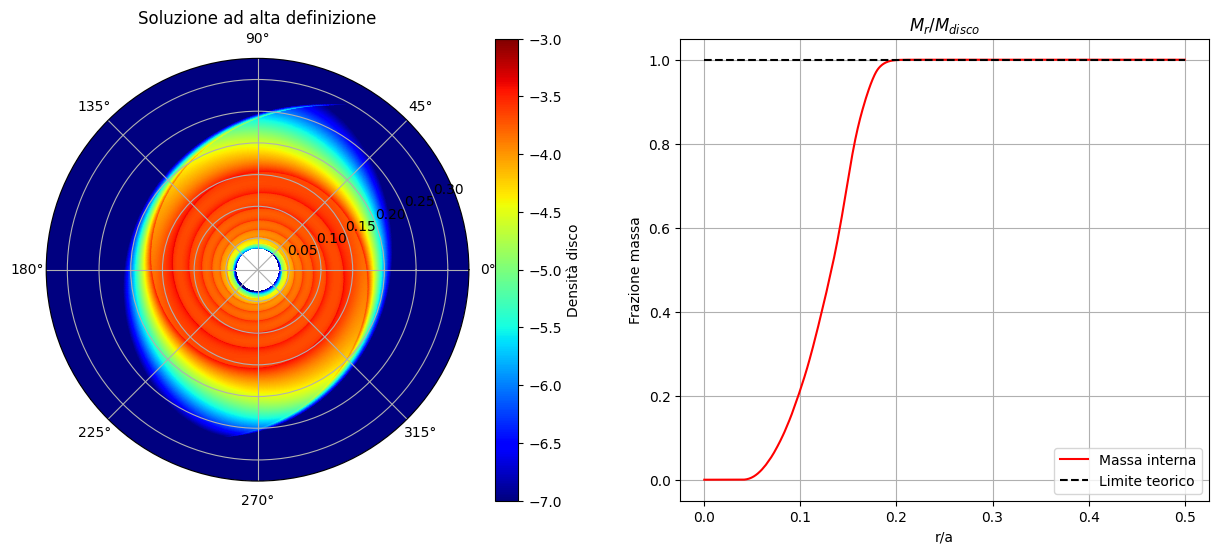

In [9]:
# Creare una figura con più grafici polari
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("../Alpha-3/Conv/HighRes/gasdens100.dat").reshape(768, 2304)
vx = np.fromfile("../Alpha-3/Conv/HighRes/gasvx100.dat").reshape(768, 2304)
vy = np.fromfile("../Alpha-3/Conv/HighRes/gasvy100.dat").reshape(768, 2304)
ax = fig.add_subplot(1, 2, 1, projection='polar')

#----------------------------------#
#          Creo la griglia          #
#-----------------------------------#

# Creare una griglia di valori R e Theta
theta = np.linspace(-np.pi, np.pi, 2304)
#Creo coordinata radiale corretta
r = np.linspace(0.4/12, 4.0/12, 769)
r_plot = np.zeros(768)
rcal = np.zeros((768, 2304))
area = np.zeros((768, 2304))
for k in range(0, len(r_plot)):
    r_plot[k] = (r[k+1] - r[k])/2 + r[k]
    appo = np.pi * (r[k+1]**2 - r[k]**2)/2304

    for j in range(0, 2304):
        rcal[k, j] = r_plot[k]
        area[k, j] = appo

#Creo la griglia
Theta, R = np.meshgrid(theta, r_plot)


#Disegnare il grafico polare
cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax =-3)
plt.colorbar(cax, label='Densità disco')
ax.set_rmin(0)
ax.set_rmax(4.0/12)
ax.set_title(f'Soluzione ad alta definizione')

#Creo massa in funzione della distanza
ax = fig.add_subplot(1, 2, 2)

ene = 0.5 * (vx**2 + vy**2) - 1/(rcal * 12)
sax = -1/(2 * ene * 12)


m_prog = []
sax_mag = np.linspace(0, 0.5, 1000)
mass = rho * area

#Creo le masse progressive
for i in range(0, len(sax_mag)):
    m_prog.append(mass[sax < sax_mag[i]].sum())  

m_prog = np.array(m_prog)
for i in range(0, len(sax_mag)):
    if m_prog[i] >= par_rag * m_prog[999]:
        ind = i
        break

print("Il semi-asse di troncamento del disco è pari a: " + str(round(sax_mag[ind], 3)) +" a")

y_teo = np.zeros(1000)
for i in range(0, len(y_teo)):
    y_teo[i] = 0.999

ax.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa interna')
ax.plot(sax_mag, y_teo, color = 'black', linestyle = '--', label = 'Limite teorico')
ax.set_title(r'$M_r/M_{disco}$')
ax.set_xlabel(r'r/a')
ax.set_ylabel('Frazione massa')
ax.legend(loc='best')
ax.grid(True)

plt.show()

### Confronto fra semi-assi

In [10]:
titolo = np.array(["definizione normale", "alta definizione"])

num = np.array([41, 41])
rmax = np.array([4.0, 4.0])
rmin = np.array([0.4, 0.4])
dist = np.array([12, 12])
inte = np.array([1152, 384, 2304, 768])

for h in range(0, 2):

    sax_ev = np.zeros(num[h])

    r = np.linspace(rmin[h], rmax[h], (inte[2*h+1]+1))
    r_plot = np.zeros(inte[2*h+1])
    rcal = np.zeros((inte[2*h+1], inte[2*h]))
    for i in range(0, len(r_plot)):
        r_plot[i] = (r[i+1] + r[i])/2
        for j in range(0, inte[2*h]):
            rcal[i, j] = r_plot[i]

    area = np.zeros((inte[2*h+1], inte[2*h]))
    for i in range(0,inte[2*h+1]):
        for j in range(0, inte[2*h]):
            #Calcolo area della singola sezione
            area[i, j] = np.pi * (pow(r[i+1],2)-pow(r[i],2))/inte[2*h]

    for k in range(0, num[h]):

        if h == 1:
            rho = np.fromfile("../Alpha-3/Conv/HighRes/gasdens" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])
            vx = np.fromfile("../Alpha-3/Conv/HighRes/gasvx" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])
            vy = np.fromfile("../Alpha-3/Conv/HighRes/gasvy" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])

        else:
            rho = np.fromfile("../Alpha-3/NoEcc/MR0.33/gasdens" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])
            vx = np.fromfile("../Alpha-3/NoEcc/MR0.33/gasvx" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])
            vy = np.fromfile("../Alpha-3/NoEcc/MR0.33/gasvy" + str(60+k) + ".dat").reshape(inte[2*h+1], inte[2*h])
                
        ene = 0.5 * (vx**2 + vy**2) - 1/(rcal)
        sax = -1/(2 * ene * 12)


        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)
        mass = rho * area

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())  

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= par_rag * m_prog[999]:
                sax_ev[k] = sax_mag[i]
                break

    print('Il semi-asse maggiore di troncamento del disco con ' + titolo[h] +' è pari a: ' + str(round(sax_ev.sum()/len(sax_ev), 3)) + ' a')

Il semi-asse maggiore di troncamento del disco con definizione normale è pari a: 0.194 a
Il semi-asse maggiore di troncamento del disco con alta definizione è pari a: 0.2 a


<center>

# <span style="color:blue;"> Run Lunga </span>

<center>

### Diminuzione raggio

In [16]:
sax_out = np.zeros(142)

#Creo i sax_outgi corretti, ossia i centro zona dove è definita la densità
r = np.linspace(0.4, 4.0, 385)
r_plot = np.zeros(384)
for i in range(0, len(r_plot)):
    r_plot[i] = (r[i+1] - r[i])/2 + r[i]

rcal = np.zeros((384, 1152))
area = np.zeros((384, 1152))
for i in range(0, 384):

    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        rcal[i, j] = r_plot[i]
        area[i, j] = appo

sax_mag = np.linspace(0, 0.5, 1000)

for k in range(0, 142):
    #Importo la densità considerata
    rho = np.fromfile("../Alpha-3/Conv/RunLunga/gasdens" + str(k) + ".dat").reshape(384, 1152)
    vx = np.fromfile("../Alpha-3/Conv/RunLunga/gasvx" + str(k) + ".dat").reshape(384, 1152)
    vy = np.fromfile("../Alpha-3/Conv/RunLunga/gasvy" + str(k) + ".dat").reshape(384, 1152)

    ene = 0.5 * (vx**2 + vy**2) - 1/rcal
    sax = -1/(2 * ene * 12)
    mass = rho * area

    M = []
    for i in range(0, len(sax_mag)):
        M.append(mass[sax < sax_mag[i]].sum())

    M = np.array(M)
    for i in range(0, len(M)):
        if M[i] >= 0.999 * M[999]:
            sax_out[k] = sax_mag[i]
            break

FileNotFoundError: [Errno 2] No such file or directory: '../Alpha-3/Conv/RunLunga/gasvx0.dat'

<center>

# <span style="color:blue;"> Presentazione dei risultati </span>

<center>

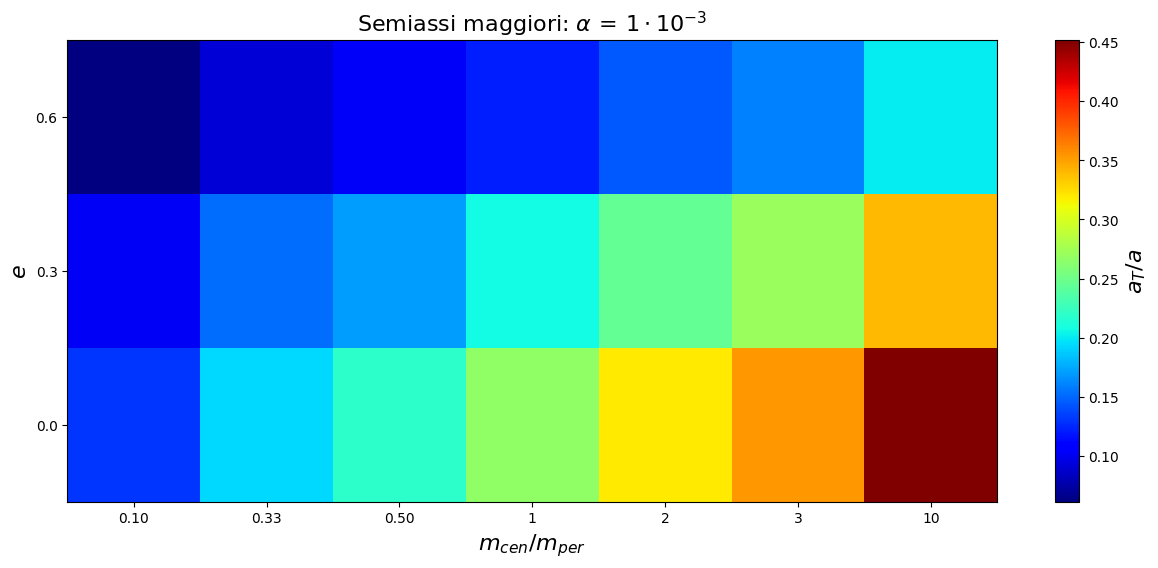

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)

#Riempio i vari raggi del disco
r_disco = np.zeros((3,7))
for i in range(0,3):
    for j in range(0, 7):

        if i==0:
            r_disco[i, j] = sax_A3_e0[j]
        elif i==1:
            r_disco[i, j] = sax_A3_e3[j]
        elif i==2:
            r_disco[i, j] = sax_A3_e6[j]

# Disegnare il grafico polare
cax = ax.pcolormesh(mr, ecc, r_disco, cmap='jet', vmin = np.min(r_disco), vmax =np.max(r_disco))
cb = plt.colorbar(cax, label=r'$a_T/a$')
cb.set_label(label=r'$a_T/a$', fontsize =16)
ax.set_xlabel(r"$m_{cen}/m_{per}$", fontsize =16)
ax.set_ylabel(r"$e$", fontsize =16)
ax.set_title(r"Semiassi maggiori: $\alpha\,=\,1 \cdot 10^{-3}$", fontsize = 16)

ax.set_xticks(mr[0])
ax.set_yticks([1, 3, 5])

ax.set_yticklabels(['0.0', '0.3', '0.6'])
ax.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:blue;"> Confronto con i risultati teorici </span>

<center>

Per determinare il raggio di troncamento teorico lavoro con:
$$ R_t\,=\,R_{Egg}\left(\alpha e^{\beta}\,+\,\gamma \mu^{\delta}\right)$$
dove:
$$ R_{Egg}\,=\,\frac{0.49 q^{2/3}}{0.6 q^{2/3}\,+\,\ln(1\,+\,q^{1/3})} $$

In [12]:
mu = np.array([1.0/11.0, 1.0/4.0, 1.0/3.0, 1.0/2.0, 1.0/1.5, 3.0/4.0, 1.0/1.1])
mr = np.array([0.1, 0.33, 0.5, 1.0, 2.0, 3.0, 10.0])

gamma = 0.88
delta = 0.01

y_ecc = np.array([0.0, 0.3, 0.6])

#Interpolato su Reynholds
alfa = - np.array([0.871, 0.823, 0.823, 0.813, 0.806, 0.795, 0.758])
beta = np.array([0.761, 0.775, 0.767, 0.740, 0.719, 0.695, 0.636])

#Raggi Eggleton
rag_egg = np.zeros(len(mr))
for i in range(0, len(rag_egg)):
    rag_egg[i] = (0.49 * pow(mr[i], 2.0/3.0))/(0.6 * pow(mr[i], 2.0/3.0) + math.log(1 + pow(mr[i], 1.0/3.0)))

sax_tr = np.zeros((len(y_ecc), len(mu)))

for i in range(0, len(y_ecc)):
    for j in range(0, len(mu)):
        sax_tr[i, j] = rag_egg[j] * (alfa[j] * pow(y_ecc[i], beta[j]) + gamma * pow(mu[j], delta))

### Eccentricità fissata

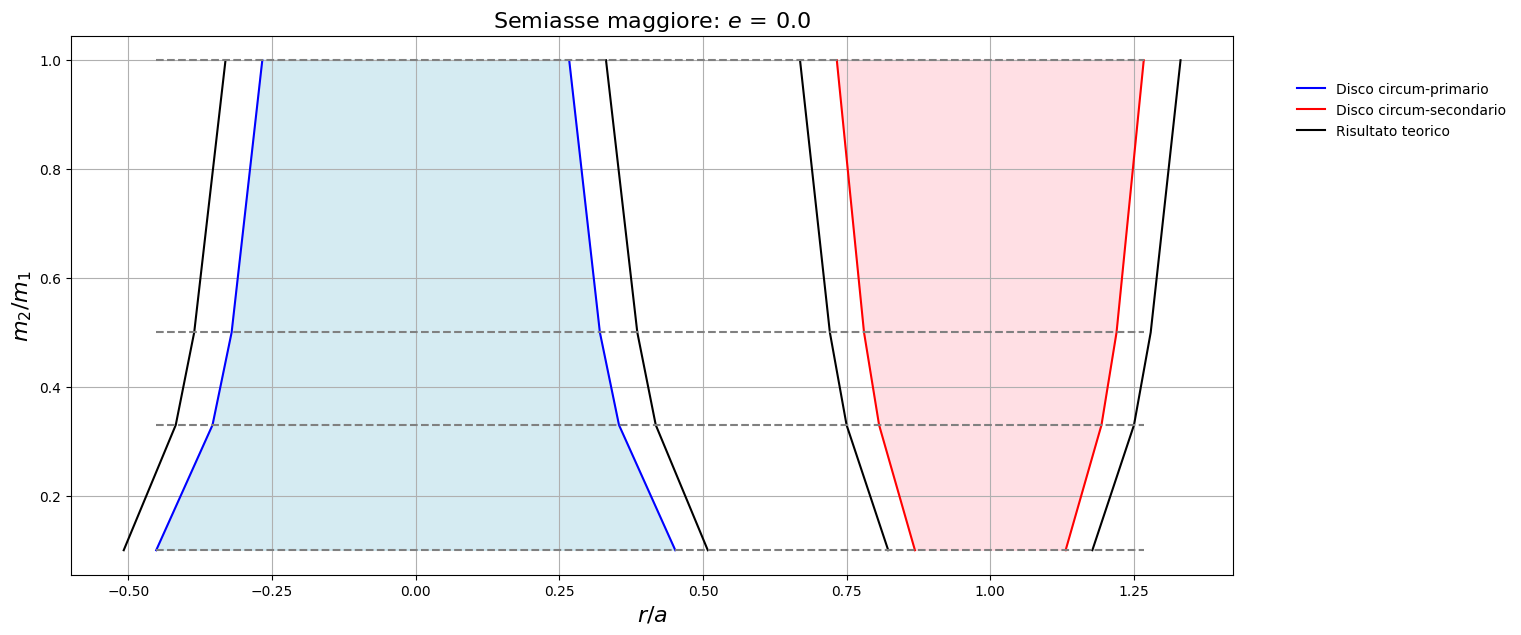

In [13]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -sax_A3_e0[6-j]
                x_teo[j] = -sax_tr[0, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = sax_A3_e0[6-j]
                x_teo[j] = sax_tr[0, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')


    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-sax_A3_e0[j]
                x_teo[j] = 1-sax_tr[0, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+sax_A3_e0[j]
                x_teo[j] = 1+sax_tr[0, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultato teorico')


for i in range(0, len(mass_ratio)):
    x = np.array([-sax_A3_e0[6], 1+sax_A3_e0[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -sax_A3_e0[6-i]
    else:
        x_fill[i] = sax_A3_e0[i-1]

x_fill[8] = -sax_A3_e0[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-sax_A3_e0[i]
    else:
        x_fill[i] = 1+sax_A3_e0[6+1-i]

x_fill[8] = 1-sax_A3_e0[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Semiasse maggiore: $e\,=\,0.0$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()

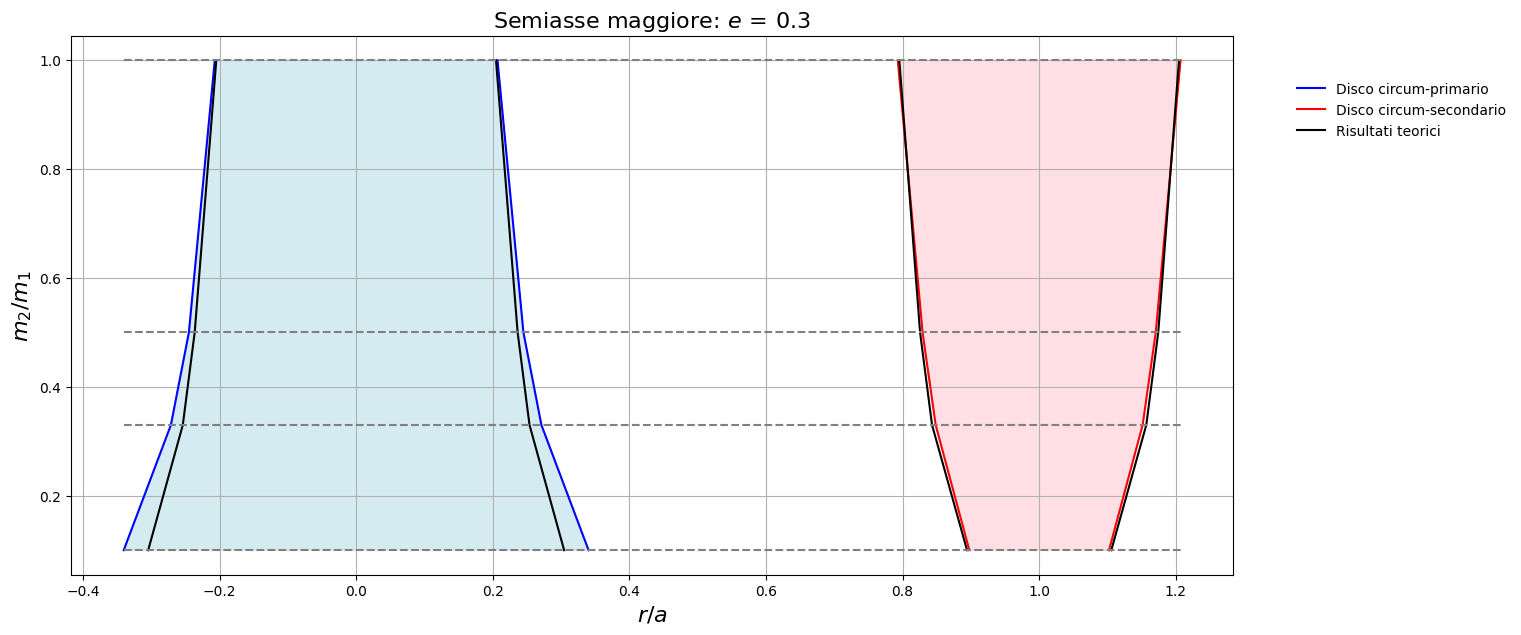

In [14]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)
x_teo = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -sax_A3_e3[6-j]
                x_teo[j] = -sax_tr[1, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = sax_A3_e3[6-j]
                x_teo[j] = sax_tr[1, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-sax_A3_e3[j]
                x_teo[j] = 1-sax_tr[1, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+sax_A3_e3[j]
                x_teo[j] = 1+sax_tr[1, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-sax_A3_e3[6], 1+sax_A3_e3[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -sax_A3_e3[6-i]
    else:
        x_fill[i] = sax_A3_e3[i-1]

x_fill[8] = -sax_A3_e3[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-sax_A3_e3[i]
    else:
        x_fill[i] = 1+sax_A3_e3[6+1-i]

x_fill[8] = 1-sax_A3_e3[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Semiasse maggiore: $e\,=\,0.3$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()

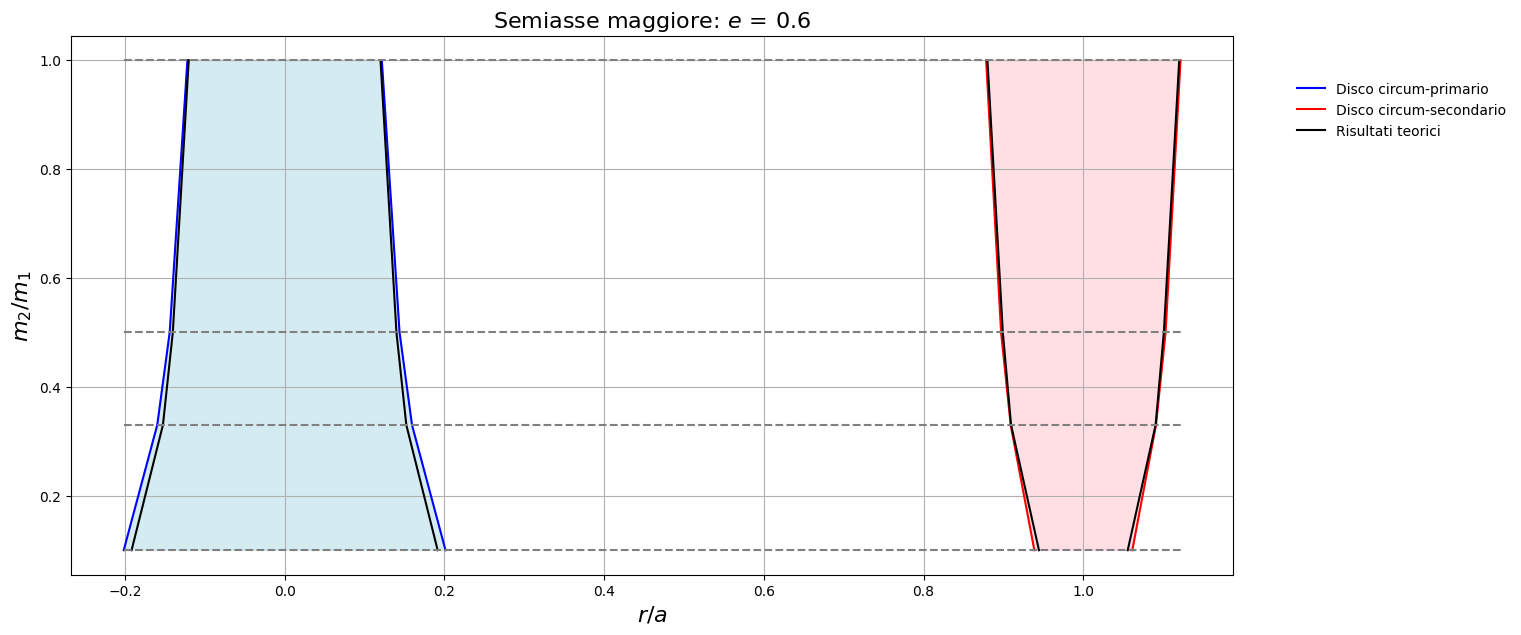

In [15]:
fig = plt.figure(figsize=(15, 7))

mass_ratio = np.array([0.1, 0.33, 0.5, 1])
x = np.zeros(4)

for i in range(0, len(mass_ratio)):
    if i<2: 
        if i==0:
            for j in range(0, len(mass_ratio)):
                x[j] = -sax_A3_e6[6-j]
                x_teo[j] = -sax_tr[2, 6-j]

            plt.plot(x, mass_ratio, color = 'blue', label = 'Disco circum-primario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = sax_A3_e6[6-j]
                x_teo[j] = sax_tr[2, 6-j]

            plt.plot(x, mass_ratio, color = 'blue')
            plt.plot(x_teo, mass_ratio, color = 'black')

    
    else:
        if i==2:
            for j in range(0, len(mass_ratio)):
                x[j] = 1-sax_A3_e6[j]
                x_teo[j] = 1-sax_tr[2, j]

            plt.plot(x, mass_ratio, color = 'red', label = 'Disco circum-secondario')
            plt.plot(x_teo, mass_ratio, color = 'black')

        else:
            for j in range(0, len(mass_ratio)):
                x[j] = 1+sax_A3_e6[j]
                x_teo[j] = 1+sax_tr[2, j]

            plt.plot(x, mass_ratio, color = 'red')
            plt.plot(x_teo, mass_ratio, color = 'black', label = 'Risultati teorici')


for i in range(0, len(mass_ratio)):
    x = np.array([-sax_A3_e6[6], 1+sax_A3_e6[3]])
    y = np.array([mass_ratio[i], mass_ratio[i]])

    plt.plot(x, y, color = 'grey', linestyle = '--')
    

#Riempio le regioni da colorare
#Devo prima di tutto specificare quali siano i bordi della figura

#Regione disco circum-primario
x_fill = np.zeros(9)
y_fill = np.zeros(9)

for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = -sax_A3_e6[6-i]
    else:
        x_fill[i] = sax_A3_e6[i-1]

x_fill[8] = -sax_A3_e6[6]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='lightblue', alpha=0.5)


#Regione disco circum-secondario
for i in range(0, len(x_fill)-1):
    if i<len(mass_ratio):
        x_fill[i] = 1-sax_A3_e6[i]
    else:
        x_fill[i] = 1+sax_A3_e6[6+1-i]

x_fill[8] = 1-sax_A3_e6[0]
y_fill = np.concatenate((mass_ratio, mass_ratio[::-1], np.array([0.1])))
plt.fill(x_fill, y_fill, color='pink', alpha=0.5)



plt.title(r'Semiasse maggiore: $e\,=\,0.6$', fontsize = 16)
plt.ylabel(r'$m_2/m_1$', fontsize = 16)
plt.xlabel(r'$r/a$', fontsize = 16)
plt.legend(loc=(1.05, 0.8), frameon=False)
plt.grid(True)
plt.show()